# **Story**

In a village, there is a research project aimed at improving the quality of life for residents through data analysis. Researchers have collected various data from each household in the village. The collected data includes information on drinking water sources, sanitation conditions, household appliance usage, and various other health and economic indicators.

The researchers want to use machine learning methods to analyze this data. They have two main objectives:
1. **Drinking Water Quality Classification** <br>
Researchers want to create a model that can predict whether the drinking water in a household is safe to drink based on other available features in the dataset. In the collected data, there is a variable DC201 that indicates the drinking water quality (Safe to Drink or Not Safe to Drink). This model will help the village government identify households that need more attention in providing clean water.

2. **Household Segmentation**<br>
Researchers also want to cluster households into several segments based on their similar characteristics. The goal of this segmentation is to understand common patterns in the data and help design more targeted intervention programs. For example, a segment of households with poor sanitation access can be prioritized in sanitation improvement programs.


# **Dataset**
- **Variabel Description.xlsx**: metadata
- **Data Tugas 3.csv**: main dataset used in model development

# **Exercise**
1. Conduct an analysis of the provided data.
2. Perform and explain the exploration and visualization processes you undertook. It is mandatory to interpret the results of the visualizations and explain the next steps or their impact on the analysis.
3. Conduct data preprocessing steps and explain why you used those methods.
4. Process the data to achieve the best results. Processing includes Classification Analysis and Segmentation Analysis.
5. Interpret or visualize your processing results.

### Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# add other

### Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Tugas 3.csv")
display(df) # Look on to Variabel Description.xlsx to see information for each variable

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,1,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,Layak Minum
1,2,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,Layak Minum
2,3,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,Layak Minum
3,6,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,NaN,1.0,0.0,1.0,1,11.0,85.0,Layak Minum
4,7,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,Layak Minum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,47958,94,1,17.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,NaN,0.0,0.0,0.0,1,21.0,9.0,Layak Minum
35969,47959,94,1,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,12.0,Layak Minum
35970,47961,94,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1,11.0,48.0,Layak Minum
35971,47962,94,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,39.0,Layak Minum


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35973 entries, 0 to 35972
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      35973 non-null  int64  
 1   DC024   35973 non-null  int64  
 2   DC025   35973 non-null  int64  
 3   DC205   35962 non-null  float64
 4   DC206   35952 non-null  float64
 5   DC207   35929 non-null  float64
 6   DC208   35960 non-null  float64
 7   DC209   35955 non-null  float64
 8   DC210   35932 non-null  float64
 9   DC211   35949 non-null  float64
 10  DC212   35949 non-null  float64
 11  DC213   35896 non-null  float64
 12  DC214   35964 non-null  float64
 13  DC215   35959 non-null  float64
 14  DC216   35934 non-null  float64
 15  DC217   35973 non-null  int64  
 16  DC219   35973 non-null  int64  
 17  DC220   35969 non-null  float64
 18  DC226   35967 non-null  float64
 19  DC230a  35962 non-null  float64
 20  DC230b  32964 non-null  float64
 21  DC232   32949 non-null  float64
 22

In [ ]:
df.isna().sum()/df.shape[0]*100

id         0.000000
DC024      0.000000
DC025      0.000000
DC205      0.030578
DC206      0.058377
DC207      0.122314
DC208      0.036138
DC209      0.050038
DC210      0.113974
DC211      0.066717
DC212      0.066717
DC213      0.214049
DC214      0.025019
DC215      0.038918
DC216      0.108415
DC217      0.000000
DC219      0.000000
DC220      0.011119
DC226      0.016679
DC230a     0.030578
DC230b     8.364607
DC232      8.406305
DC232b     8.406305
DC235     29.038446
DC237      0.058377
DC237a     0.102855
DC237b     0.102855
DC237c     0.102855
DC237d     0.102855
DC237e     0.102855
DC237f     0.102855
DC241      1.701276
DC242     14.938982
DC244      0.011119
DC246      0.025019
DC252      0.038918
DC270a     0.000000
DC109      0.030578
DC142a     0.144553
DC201      0.008340
dtype: float64

In [ ]:
#drop missing value feature target
df.dropna(subset= 'DC201', inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df.duplicated().sum()

4

In [ ]:
df = df.drop_duplicates()

### Exploratory Data Analysis

#### Varaible Target

<Axes: xlabel='count', ylabel='DC201'>

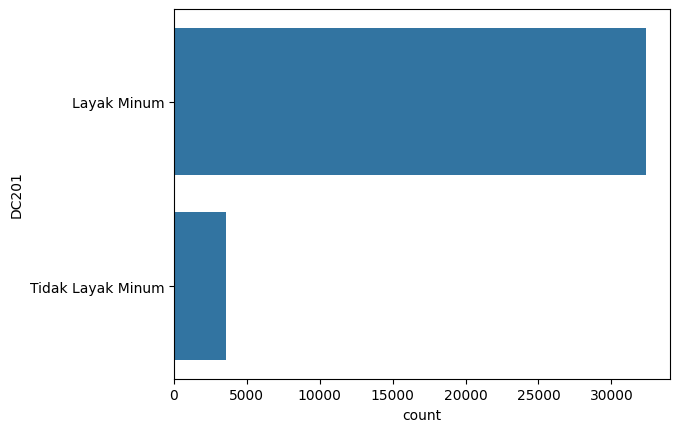

In [ ]:
sns.countplot(df['DC201'])

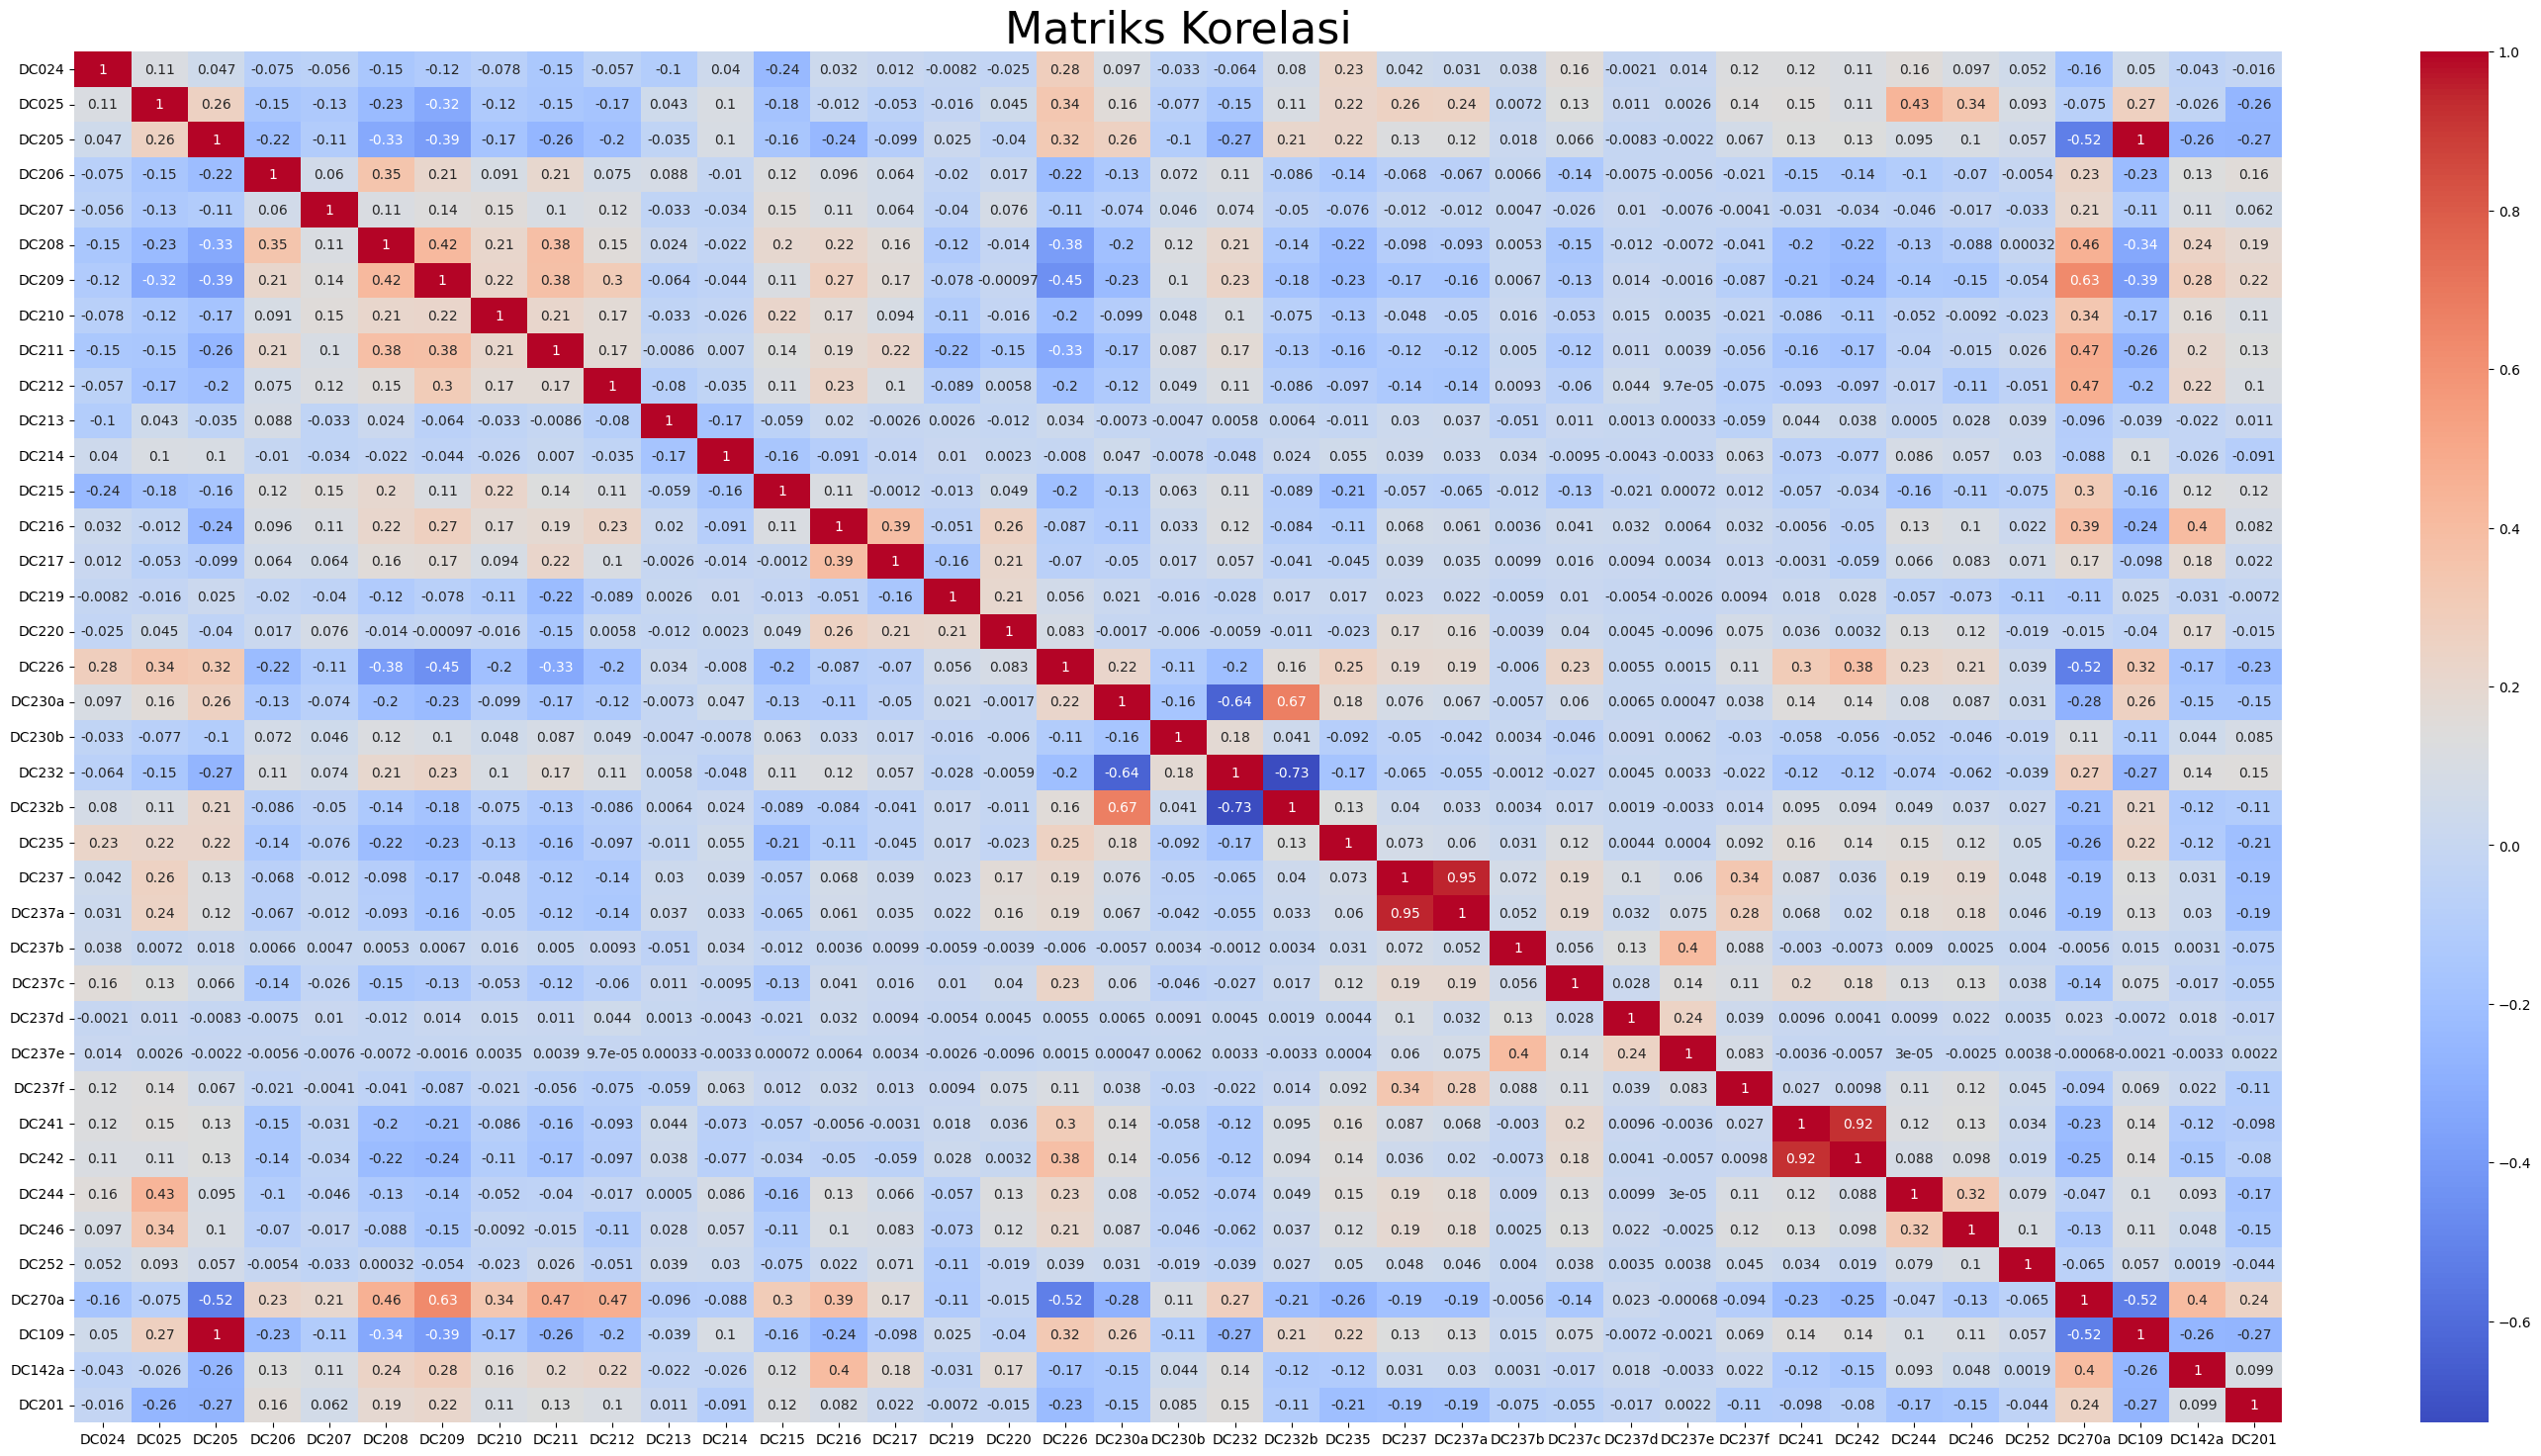

In [ ]:
# Analisis Korelasi
kor = df.corr(method="spearman")

plt.figure(figsize=(36,18))
sns.heatmap(kor, annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi", fontsize=32)
plt.savefig("Matriks_korelasi_KualitasAir.jpg", bbox_inches='tight', dpi=800)

In [ ]:
cat = df.select_dtypes(include=['float']).columns

In [ ]:
len(cat)

33

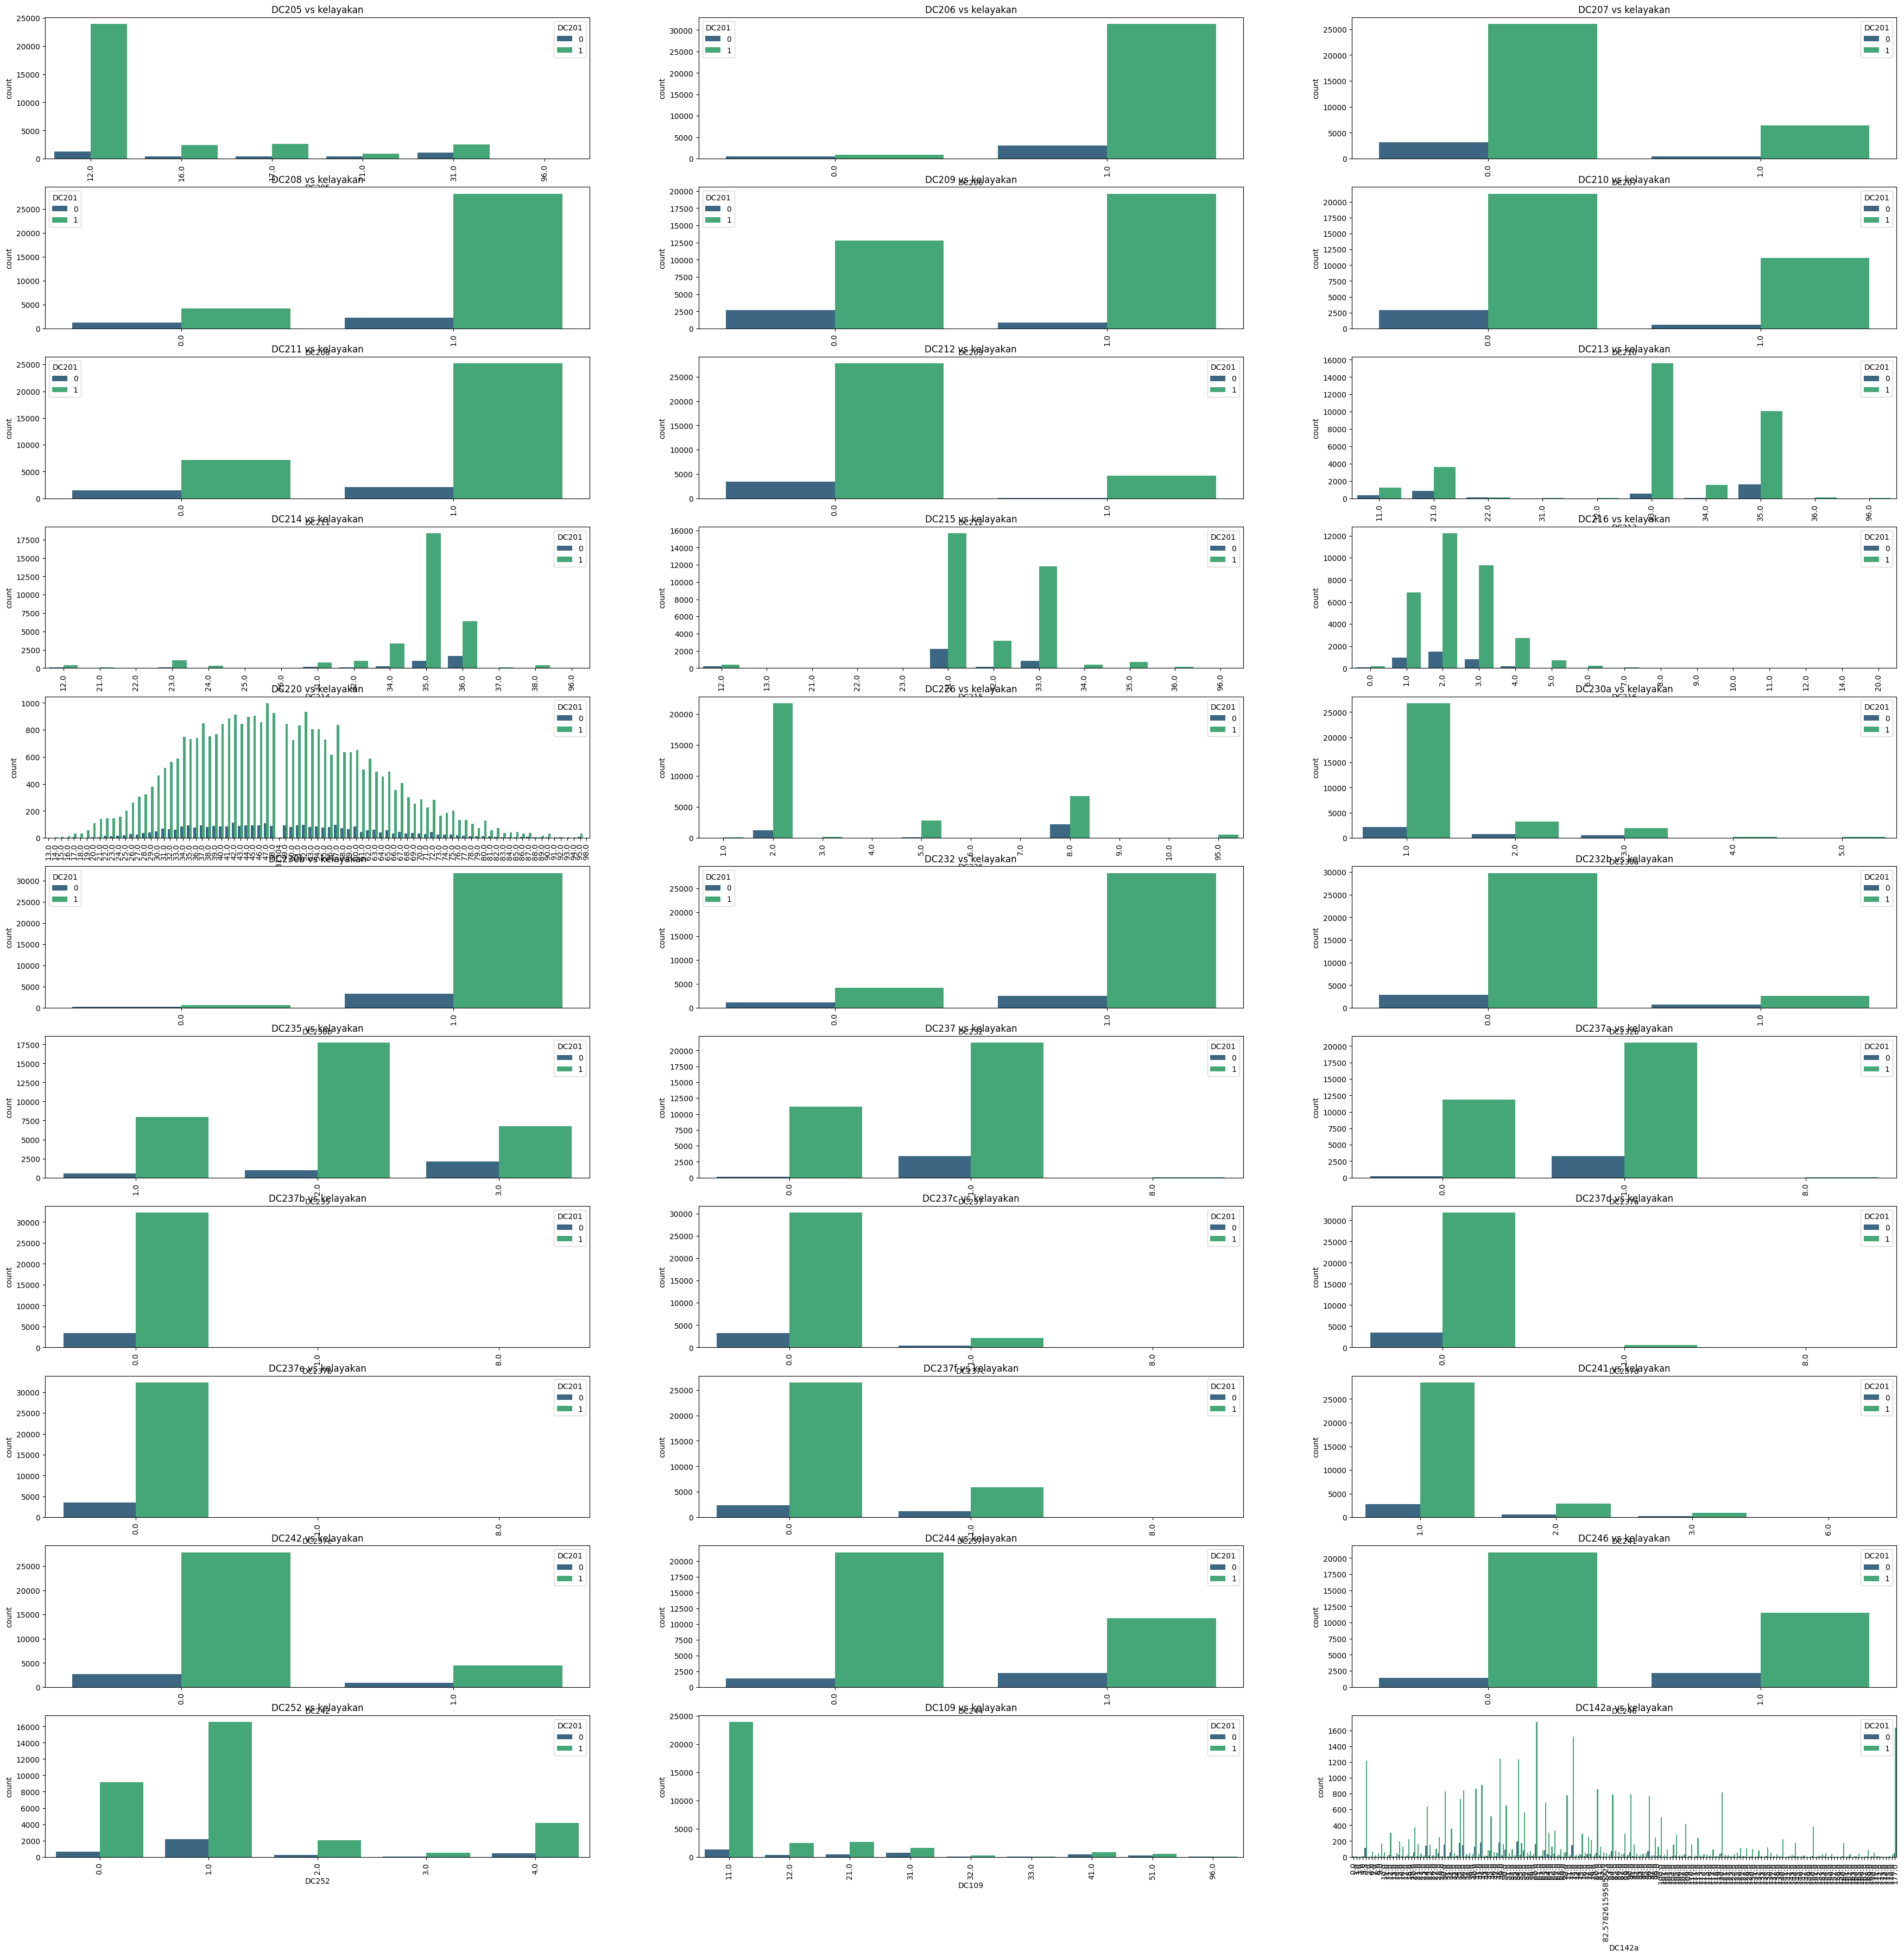

In [ ]:
plt.figure(figsize=(44, 44))

# Make bar charts
for i in range(len(cat)):
    plt.subplot(11, 3, i+1)
    sns.countplot(data = df, x = cat[i], hue = 'DC201', palette = 'viridis')
    plt.title(f'{cat[i]} vs kelayakan')
    plt.xticks(rotation = 90)

#### **Penjelasan**
---
Eksplorasi Banyak dilakukan manual melihat karakteristik pada variabel-variabel yang ada, dengan hasil berupa imputasi missing value pada tahap pre-processing.

### Pre-prepocessing

#### Handling Missing Value

In [ ]:
df = df.drop(index=[34468,34900,9808,20436,13838,
                    13844,13859,13863,13865,12380,
                    12365,12282,18620,18481,18739,
                    35550,6642])

In [ ]:
df.DC205.fillna(96, inplace = True)

df['DC206'][df['DC206'].isnull()][df["DC207"] == 0][df["DC208"] == 0][df["DC209"] == 0] = 0
df.DC206.fillna(df.DC206.mode()[0], inplace = True)

df.DC207.fillna(df.DC207.mode()[0], inplace = True)

df["DC208"][df["DC208"].isnull()][df["DC206"] == 0] = 0
df["DC209"][df["DC209"].isnull()][df["DC206"] == 0] = 0
df.DC208.fillna(df.DC208.mode()[0], inplace = True)
df.DC209.fillna(df.DC209.mode()[0], inplace = True)

df.DC210.fillna(df.DC210.mode()[0], inplace = True)
df.DC211.fillna(df.DC211.mode()[0], inplace = True)
df.DC212.fillna(df.DC212.mode()[0], inplace = True)
df.DC213.fillna(df.DC213.mode()[0], inplace = True)
df.DC214.fillna(df.DC214.mode()[0], inplace = True)
df.DC215.fillna(df.DC215.mode()[0], inplace = True)
df.DC216.fillna(df.DC216.mode()[0], inplace = True)

df.DC220.fillna(df.DC220.sum()/(35970-df.DC220.isnull().sum()), inplace = True)

df.DC226.fillna(df.DC226.mode()[0], inplace = True)
df.DC230a.fillna(df.DC230a.mode()[0], inplace = True)

df['DC230b'][df['DC230b'].isnull()][df['DC230a']==0] = 0
df.DC230b.fillna(1, inplace = True)

df['DC232'][df['DC232'].isnull()][df['DC230b']==1] = 1
df.DC232.fillna(0, inplace = True)

df['DC232b'][df['DC232b'].isnull()][df['DC230b']==1] = 0
df.DC232b.fillna(1, inplace = True)

#
import random
df.DC235.fillna(random.randint(1,3), inplace = True)
#
df.DC237.fillna(8, inplace = True)
df.DC237a.fillna(8, inplace = True)
df.DC237b.fillna(8, inplace = True)
df.DC237c.fillna(8, inplace = True)
df.DC237d.fillna(8, inplace = True)
df.DC237e.fillna(8, inplace = True)
df.DC237f.fillna(8, inplace = True)
#
df.DC241.fillna(df.DC241.mode()[0], inplace = True)



##fill missing value

#
df.DC244.fillna(df.DC244.mode()[0], inplace = True)
df.DC246.fillna(df.DC246.mode()[0], inplace = True)
df.DC252.fillna(df.DC252.mode()[0], inplace = True)
#
df.DC109.fillna(96, inplace = True)
#
df.DC142a.fillna(df.DC142a.sum()/(35970-df.DC142a.isnull().sum()), inplace = True)

In [ ]:
df["DC242"][df["DC242"].isna() & df["DC241"] != 1] = 0
df["DC242"][df["DC242"].isna() & df["DC241"] == 1] = 1

<ipython-input-227-0cd96b4c070f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DC242"][df["DC242"].isna() & df["DC241"] != 1] = 0
<ipython-input-227-0cd96b4c070f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DC242"][df["DC242"].isna() & df["DC241"] == 1] = 1


In [ ]:
df['DC241'].value_counts()

DC241
1.0    31257
2.0     3486
3.0     1202
6.0        4
Name: count, dtype: int64

In [ ]:
df.isna().sum()

DC024     0
DC025     0
DC205     0
DC206     0
DC207     0
DC208     0
DC209     0
DC210     0
DC211     0
DC212     0
DC213     0
DC214     0
DC215     0
DC216     0
DC217     0
DC219     0
DC220     0
DC226     0
DC230a    0
DC230b    0
DC232     0
DC232b    0
DC235     0
DC237     0
DC237a    0
DC237b    0
DC237c    0
DC237d    0
DC237e    0
DC237f    0
DC241     0
DC242     0
DC244     0
DC246     0
DC252     0
DC270a    0
DC109     0
DC142a    0
DC201     0
dtype: int64

#### handling Outlier

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['DC142a', 'DC216', 'DC220']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    df['DC142a'][(df[col] >= high_limit)] = high_limit
    df['DC142a'][(df[col] <= low_limit)] = high_limit


Jumlah baris sebelum memfilter outlier: 35949


<ipython-input-230-f83211d89327>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DC142a'][(df[col] >= high_limit)] = high_limit
<ipython-input-230-f83211d89327>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DC142a'][(df[col] <= low_limit)] = high_limit
<ipython-input-230-f83211d89327>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DC142a'][(df[col] >= high_limit)] = high_limit
<ipython-input-230-f83211d89327>:11: S

#### Scaler

In [ ]:
from sklearn.preprocessing import LabelEncoder
df[['DC201']] = df[['DC201']].apply(LabelEncoder().fit_transform)

df['DC201'][df['DC201'] == 0] =3
df['DC201'][df['DC201'] == 1] =0
df['DC201'][df['DC201'] == 3] =1

df

<ipython-input-231-da48f4cbf714>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DC201'][df['DC201'] == 0] =3
<ipython-input-231-da48f4cbf714>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DC201'][df['DC201'] == 1] =0
<ipython-input-231-da48f4cbf714>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DC201'][df['DC201'] == 3] =1


,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,1
1,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,1
2,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,1
3,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,1.0,1.0,0.0,1.0,1,11.0,85.0,1
4,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,94,1,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1.0,0.0,0.0,0.0,1,21.0,9.0,1
35969,94,1,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2,11.0,12.0,1
35970,94,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1,11.0,48.0,1
35971,94,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2,11.0,39.0,1


In [ ]:
# Import library untuk memisahkan data menjadi data train dan test

from sklearn.model_selection import train_test_split

X = df.drop('DC201', axis =1)
y = df['DC201']

In [ ]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **Penjelasan**
---
Bla bla bla
Bla bla bla
Bla bla

### Processing 1<sup>st</sup> Analysis

In [ ]:
# Install library

%pip install catboost xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.0 MB/s eta 0:00:00


#### Basic Classification

In [ ]:
# Import library atas algoritma / metode klasifikasi yang digunakan

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [ ]:
# Membuat fungsi untuk mengevaluasi semua model secara otomatis

def all_model(list_model, X, y, test_size = 0.2, random_state = None, stratify = None):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, stratify = stratify, random_state = random_state)

    # List kosong untuk menyimpan semua hasil pengukuran
    result = []
    for model in list_model:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Hitung nilai berdasarkan model yang sudah di train / fit dan hasil prediksinya
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)


        # Kumpulkan nilai-nilai di atas menjadi satu
        hasil = {
            'Model' : type(model).__name__,
            'Accuracy' : accuracy,
            'F1 Score' : f1,
            'Precision' : precision,
            'Recall' : recall
        }

        # Simpan nilai model ini dalam list result
        result.append(hasil)

    # Ubah menjadi dataframe
    result_all = pd.DataFrame(result)

    return result_all


In [ ]:
# Tuliskan semua model yang ingin digunakan beserta parameter di dalamnya

list_of_model = [
    LogisticRegression(max_iter = 1000),
    LogisticRegressionCV(max_iter = 1000),
    GradientBoostingClassifier(random_state = 42),
    HistGradientBoostingClassifier(random_state = 42),
    CatBoostClassifier(random_state = 42, logging_level = 'Silent'),
    XGBClassifier(random_state = 42),
    BernoulliNB(),
    GaussianNB(),
    MultinomialNB(),
    KNeighborsClassifier()
]

In [ ]:
# Jalankan fungsi yang telah dibuat

all_listed_model = all_model(list_of_model, X, y, test_size = 0.2, stratify = y)
all_listed_model.sort_values('F1 Score', ascending = False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Model,Accuracy,F1 Score,Precision,Recall
4,CatBoostClassifier,0.916180,0.954869,0.927045,0.984414
3,HistGradientBoostingClassifier,0.914651,0.954227,0.922988,0.987654
5,XGBClassifier,0.912844,0.952953,0.927413,0.979938
2,GradientBoostingClassifier,0.911037,0.952388,0.919420,0.987809
0,LogisticRegression,0.904643,0.949095,0.914094,0.986883
1,LogisticRegressionCV,0.903670,0.948556,0.913889,0.985957
9,KNeighborsClassifier,0.898110,0.945335,0.914706,0.978086
6,BernoulliNB,0.837503,0.907008,0.935971,0.879784
7,GaussianNB,0.784821,0.869850,0.955486,0.798302
8,MultinomialNB,0.690158,0.801884,0.945504,0.696142


In [ ]:
model = CatBoostClassifier(random_state = 20, logging_level = 'Silent').fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.33      0.45       178
           1       0.93      0.99      0.96      1620

    accuracy                           0.92      1798
   macro avg       0.83      0.66      0.70      1798
weighted avg       0.91      0.92      0.91      1798



In [ ]:
model = CatBoostClassifier(random_state = 42, logging_level = 'Silent').fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.32      0.45       178
           1       0.93      0.99      0.96      1620

    accuracy                           0.92      1798
   macro avg       0.83      0.65      0.70      1798
weighted avg       0.91      0.92      0.91      1798



In [ ]:
modelXG = XGBClassifier(n_estimators=150, learning_rate=0.3, max_depth=6, subsample=1).fit(X_train, y_train)
y_pred = modelXG.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.38      0.48       178
           1       0.93      0.98      0.96      1620

    accuracy                           0.92      1798
   macro avg       0.80      0.68      0.72      1798
weighted avg       0.91      0.92      0.91      1798



In [ ]:
modelXG = XGBClassifier(n_estimators=150, learning_rate=0.3, max_depth=6, subsample=1).fit(X_train_scaled, y_train)
y_pred = modelXG.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.38      0.48       178
           1       0.93      0.98      0.96      1620

    accuracy                           0.92      1798
   macro avg       0.80      0.68      0.72      1798
weighted avg       0.91      0.92      0.91      1798



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [ ]:
# Membuat fungsi untuk mengevaluasi semua model secara otomatis

def all_model_scaled(list_model, X, y, test_size = 0.2, random_state = None, stratify = None):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, stratify = stratify, random_state = random_state)
    # Feature Scaling
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # List kosong untuk menyimpan semua hasil pengukuran
    result = []
    for model in list_model:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Hitung nilai berdasarkan model yang sudah di train / fit dan hasil prediksinya
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)


        # Kumpulkan nilai-nilai di atas menjadi satu
        hasil = {
            'Model' : type(model).__name__,
            'Accuracy' : accuracy,
            'F1 Score' : f1,
            'Precision' : precision,
            'Recall' : recall
        }

        # Simpan nilai model ini dalam list result
        result.append(hasil)

    # Ubah menjadi dataframe
    result_all = pd.DataFrame(result)

    return result_all


In [ ]:
# Tuliskan semua model yang ingin digunakan beserta parameter di dalamnya

list_of_model_scaled = [
    LogisticRegression(max_iter = 1000),
    LogisticRegressionCV(max_iter = 1000),
    GradientBoostingClassifier(random_state = 42),
    HistGradientBoostingClassifier(random_state = 42),
    CatBoostClassifier(random_state = 42, logging_level = 'Silent'),
    XGBClassifier(random_state = 42),
    BernoulliNB(),
    GaussianNB(),
    KNeighborsClassifier()
]

In [ ]:
# Jalankan fungsi yang telah dibuat

all_listed_model = all_model_scaled(list_of_model_scaled, X, y, test_size = 0.2, stratify = y)
all_listed_model.sort_values('F1 Score', ascending = False)

,Model,Accuracy,F1 Score,Precision,Recall
4,CatBoostClassifier,0.916736,0.955235,0.926098,0.986265
3,HistGradientBoostingClassifier,0.915068,0.954474,0.922778,0.988426
2,GradientBoostingClassifier,0.913122,0.953583,0.919112,0.990741
5,XGBClassifier,0.913400,0.953204,0.928582,0.979167
0,LogisticRegression,0.906033,0.949852,0.914571,0.987963
1,LogisticRegressionCV,0.905894,0.949774,0.914559,0.987809
8,KNeighborsClassifier,0.899639,0.945812,0.920660,0.972377
6,BernoulliNB,0.813456,0.889164,0.956468,0.830710
7,GaussianNB,0.801501,0.880960,0.957941,0.815432


In [ ]:
# Import library untuk melakukan cross validation

from sklearn.model_selection import KFold, cross_validate

In [ ]:
# Buat fungsi untuk melakukan CV terhadap semua fungsi

def all_model_cv(list_model, metric_list, X, y, random_state = None, n_split = 5):
    kfold = KFold(n_splits = n_split, shuffle = True, random_state = random_state)

    result = []
    for model in list_model:

        score = []
        for metric in metric_list:
            metric_score = cross_validate(model, X, y, cv = kfold, scoring = metric)
            score.append(metric_score['test_score'].mean())

        result.append(score)

    result_all = pd.DataFrame(result, columns = metric_list)

    return result_all

In [ ]:
list_of_model_cv = [
    HistGradientBoostingClassifier(random_state = 42),
    CatBoostClassifier(random_state = 42, logging_level = 'Silent'),
    XGBClassifier(random_state = 42),
]

In [ ]:
# Tentukan metric yang akan digunakan

list_of_metric = [
    'accuracy',
    'f1',
    'recall',
    'precision',
    'roc_auc',
    'neg_log_loss',
    'f1_weighted'
]

In [ ]:
# Jalankan fungsi untuk menjalankan CV terhadap semua model

all_listed_model_cv = all_model_cv(list_of_model_cv, list_of_metric, X, y, n_split = 5, random_state = 42)
all_listed_model_cv

,accuracy,f1,recall,precision,roc_auc,neg_log_loss,f1_weighted
0,0.915241,0.954411,0.985055,0.925623,0.892199,-0.213769,0.899134
1,0.915853,0.954649,0.983325,0.927606,0.895661,-0.211126,0.901307
2,0.913127,0.953001,0.977861,0.929384,0.887414,-0.221656,0.900744


#### Stacking

In [ ]:
# Define the base models for stacking ensemble
base_classifiers = [
    HistGradientBoostingClassifier(random_state = 42),
    XGBClassifier(random_state = 42)
]

In [ ]:
# Define the meta-model
meta_model = CatBoostClassifier(random_state = 42, logging_level = 'Silent')

In [ ]:
# Train the base classifiers
base_classifiers = [clf.fit(X_train, y_train) for clf in base_classifiers]

In [ ]:
# Make predictions for both training and testing sets
y_pred_train_base = [clf.predict(X_train) for clf in base_classifiers]
y_pred_test_base = [clf.predict(X_test) for clf in base_classifiers]

In [ ]:
# Create new feature sets by stacking the predictions
stacked_features_train = np.column_stack(y_pred_train_base)
stacked_features_test = np.column_stack(y_pred_test_base)

In [ ]:
# Train the meta-model
meta_model.fit(stacked_features_train, y_train)

In [ ]:
# Make predictions using the meta-model
y_pred_train_meta = meta_model.predict(stacked_features_train)
y_pred_meta = meta_model.predict(stacked_features_test)

In [ ]:
# Evaluate the performance of the stacking ensemble
print('Stacking Ensemble - F1 Score - Test Set  : ', f1_score(y_test, y_pred_meta), '\n')
print('Stacking Ensemble - Classification Report : \n', classification_report(y_test, y_pred_meta), '\n')

Stacking Ensemble - F1 Score - Test Set  :  0.9566265060240964 

Stacking Ensemble - Classification Report : 
               precision    recall  f1-score   support

           0       0.67      0.37      0.48       178
           1       0.93      0.98      0.96      1620

    accuracy                           0.92      1798
   macro avg       0.80      0.68      0.72      1798
weighted avg       0.91      0.92      0.91      1798
 



#### Hyperparams

In [ ]:
# Hyperparameter Tuning : Random Search
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define Hyperparameters for XGBoost
n_estimators= [60, 70, 75]
learning_rate= [ 0.1]
max_depth= [6]

random_search_params_rf = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate' : learning_rate

}

In [ ]:
# Random Search for Random Forest
xgb_random = RandomizedSearchCV(estimator=XGBClassifier(random_state=10),
                               param_distributions=random_search_params_rf,
                               n_iter=3, cv=3, verbose=2, random_state=42, n_jobs=-1)
xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=10, ...),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1],
                                        'max_depth': [6],
                                        'n_estimators': [60, 70, 75]},
                   random_state=42, verbose=2)

In [ ]:
xgb_random.best_params_

{'n_estimators': 75, 'max_depth': 6, 'learning_rate': 0.1}

In [ ]:
model = XGBClassifier(n_estimators= 75, max_depth = 6, learning_rate = 0.1, random_state=10)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [ ]:
y_pred_train_xg = model.predict(X_train)
y_pred_test_xg = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_test_xg))

              precision    recall  f1-score   support

           0       0.74      0.28      0.41       178
           1       0.93      0.99      0.96      1620

    accuracy                           0.92      1798
   macro avg       0.83      0.63      0.68      1798
weighted avg       0.91      0.92      0.90      1798



### Interpretation

#### **Penjelasan**
---
Didapat F1 Score weighted terbaik adalah 0.91 yaitu basic model CatBoost dan XGBoost.

### Processing 2<sup>nd</sup> Analysis

In [ ]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = scaler.get_feature_names_out(), index = df.index)
df_scaled

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,-1.366446,1.065003,0.159409,0.203905,-0.482732,0.425006,-1.150821,-0.695806,-1.773126,-0.3909,...,-0.422067,-0.361803,-0.418876,-0.760280,-0.781975,0.645557,-1.183519,-0.363417,-0.233581,0.331946
1,-1.366446,1.065003,2.574941,0.203905,-0.482732,0.425006,-1.150821,-0.695806,0.563976,-0.3909,...,-0.422067,-0.361803,-0.418876,1.315305,1.278814,-0.168671,-0.486929,1.596960,0.003030,0.331946
2,-1.366446,1.065003,-0.484732,0.203905,-0.482732,0.425006,0.868945,1.437181,0.563976,-0.3909,...,-0.422067,-0.361803,-0.418876,1.315305,1.278814,-0.982900,0.906251,-0.466594,0.121335,0.331946
3,-1.366446,1.065003,-0.484732,0.203905,-0.482732,-2.352909,-1.150821,-0.695806,0.563976,-0.3909,...,-0.422067,1.838950,2.387342,1.315305,-0.781975,-0.168671,-1.183519,-0.466594,0.357946,0.331946
4,-1.366446,1.065003,-0.484732,0.203905,-0.482732,0.425006,0.868945,-0.695806,-1.773126,-0.3909,...,-0.422067,-0.361803,-0.418876,-0.760280,1.278814,-0.982900,-0.486929,-0.466594,-0.115276,0.331946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,2.152564,-0.938964,0.320445,0.203905,-0.482732,-2.352909,-1.150821,-0.695806,-1.773126,-0.3909,...,-0.422067,4.039703,2.387342,-0.760280,-0.781975,-0.982900,-1.183519,0.565183,-1.440298,0.331946
35969,2.152564,-0.938964,-0.484732,0.203905,-0.482732,0.425006,0.868945,-0.695806,-1.773126,-0.3909,...,-0.422067,-0.361803,-0.418876,-0.760280,-0.781975,-0.982900,-0.486929,-0.466594,-1.369314,0.331946
35970,2.152564,-0.938964,-0.484732,0.203905,-0.482732,0.425006,0.868945,-0.695806,0.563976,-0.3909,...,-0.422067,-0.361803,-0.418876,-0.760280,1.278814,-0.168671,-1.183519,-0.466594,-0.517515,0.331946
35971,2.152564,-0.938964,-0.484732,0.203905,-0.482732,0.425006,0.868945,-0.695806,0.563976,-0.3909,...,-0.422067,-0.361803,-0.418876,-0.760280,-0.781975,-0.982900,-0.486929,-0.466594,-0.730465,0.331946


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

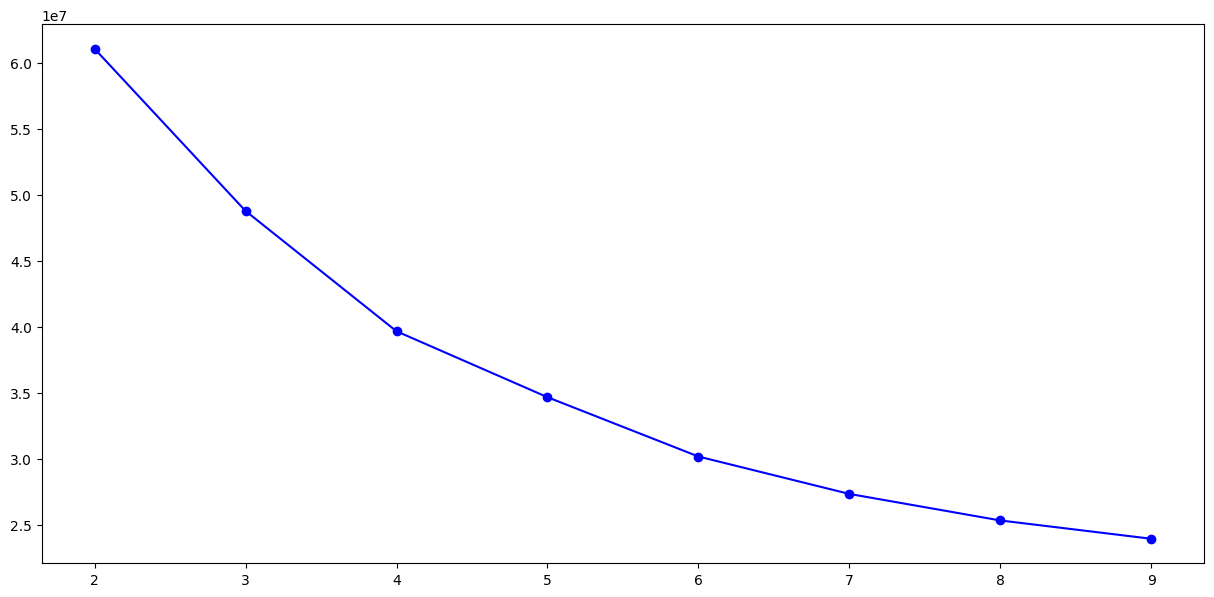

In [ ]:
# Membuat grafik untuk menentukan jumlah k yang optimal

from sklearn.cluster import KMeans
inertia = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i, random_state = 26)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 7))

plt.plot(range(8,15), inertia, 'bo-')

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 26)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=26)

In [ ]:
# Menambahkan label klaster ke dalam data

df_clustered = df.copy()

df_clustered['Cluster'] = kmeans.labels_
df_clustered

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201,Cluster
0,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,1,0
1,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,1,0
2,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,1,3
3,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1.0,1.0,0.0,1.0,1,11.0,85.0,1,3
4,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,94,1,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.0,0.0,1,21.0,9.0,1,2
35969,94,1,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2,11.0,12.0,1,2
35970,94,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1,11.0,48.0,1,2
35971,94,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2,11.0,39.0,1,2


In [ ]:
# Gunakan metric silhouette score dan davies-bouldin index

from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette = silhouette_score(df, kmeans.labels_)
db_index = davies_bouldin_score(df, kmeans.labels_)

print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")

Silhouette Score: 0.27
Davies-Bouldin Index: 1.19


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Opsional: Tuning parameter eps dan min_samples
df_db = df_scaled.copy()

for eps in [i/10 for i in range(7,10)]: # sesuaikan range parameter eps
    for min_samples in range(3, 8): # sesuaikan range parameter min_samples
        print(f'n_eps {eps}')
        print(f'min samples {min_samples}')

        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_db)

        # Periksa apakah terdapat cluster yang terbentuk
        unique_labels = np.unique(labels)
        n_clusters = len(unique_labels) - (1 if - 1 in labels else 0)  # Jumlah klaster, mengabaikan noise
        if n_clusters > 1:  # Cek apakah terdapat lebih dari satu klaster yang terbentuk
            score = silhouette_score(df_db, labels)
            print(f'clusters present: {unique_labels}')
            print(f'clusters sizes: {np.bincount(labels + 1)}')
            print(f'Silhouette Score: {score}', '\n')
        else:
            print("Tidak ada klaster yang terbentuk dengan parameter ini.\n")


n_eps 0.7
min samples 3
clusters present: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145]
clusters sizes: [35346     4     5    23     4     6     5     3     3     4     7    12
     8     4     3     3     3     3     3     4     3     3     4     3
     3     4     3     4     3     3     6    12     3     3     3     3
     3     3     5     3    13     5     3     3     9     4     3     3
     4     4     4     5     7     5     5     7    

KeyboardInterrupt: 

### Interpretation

#### **Penjelasan**
---
Silhoutte score yang didapat hanya 0.27. Perlu ditingkatkan menggunakan metode lain.